# Imports

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Exploration

In [32]:
image = mpimg.imread('../data/calibration_imgs/signs_vehicles_xygrad2.jpg')

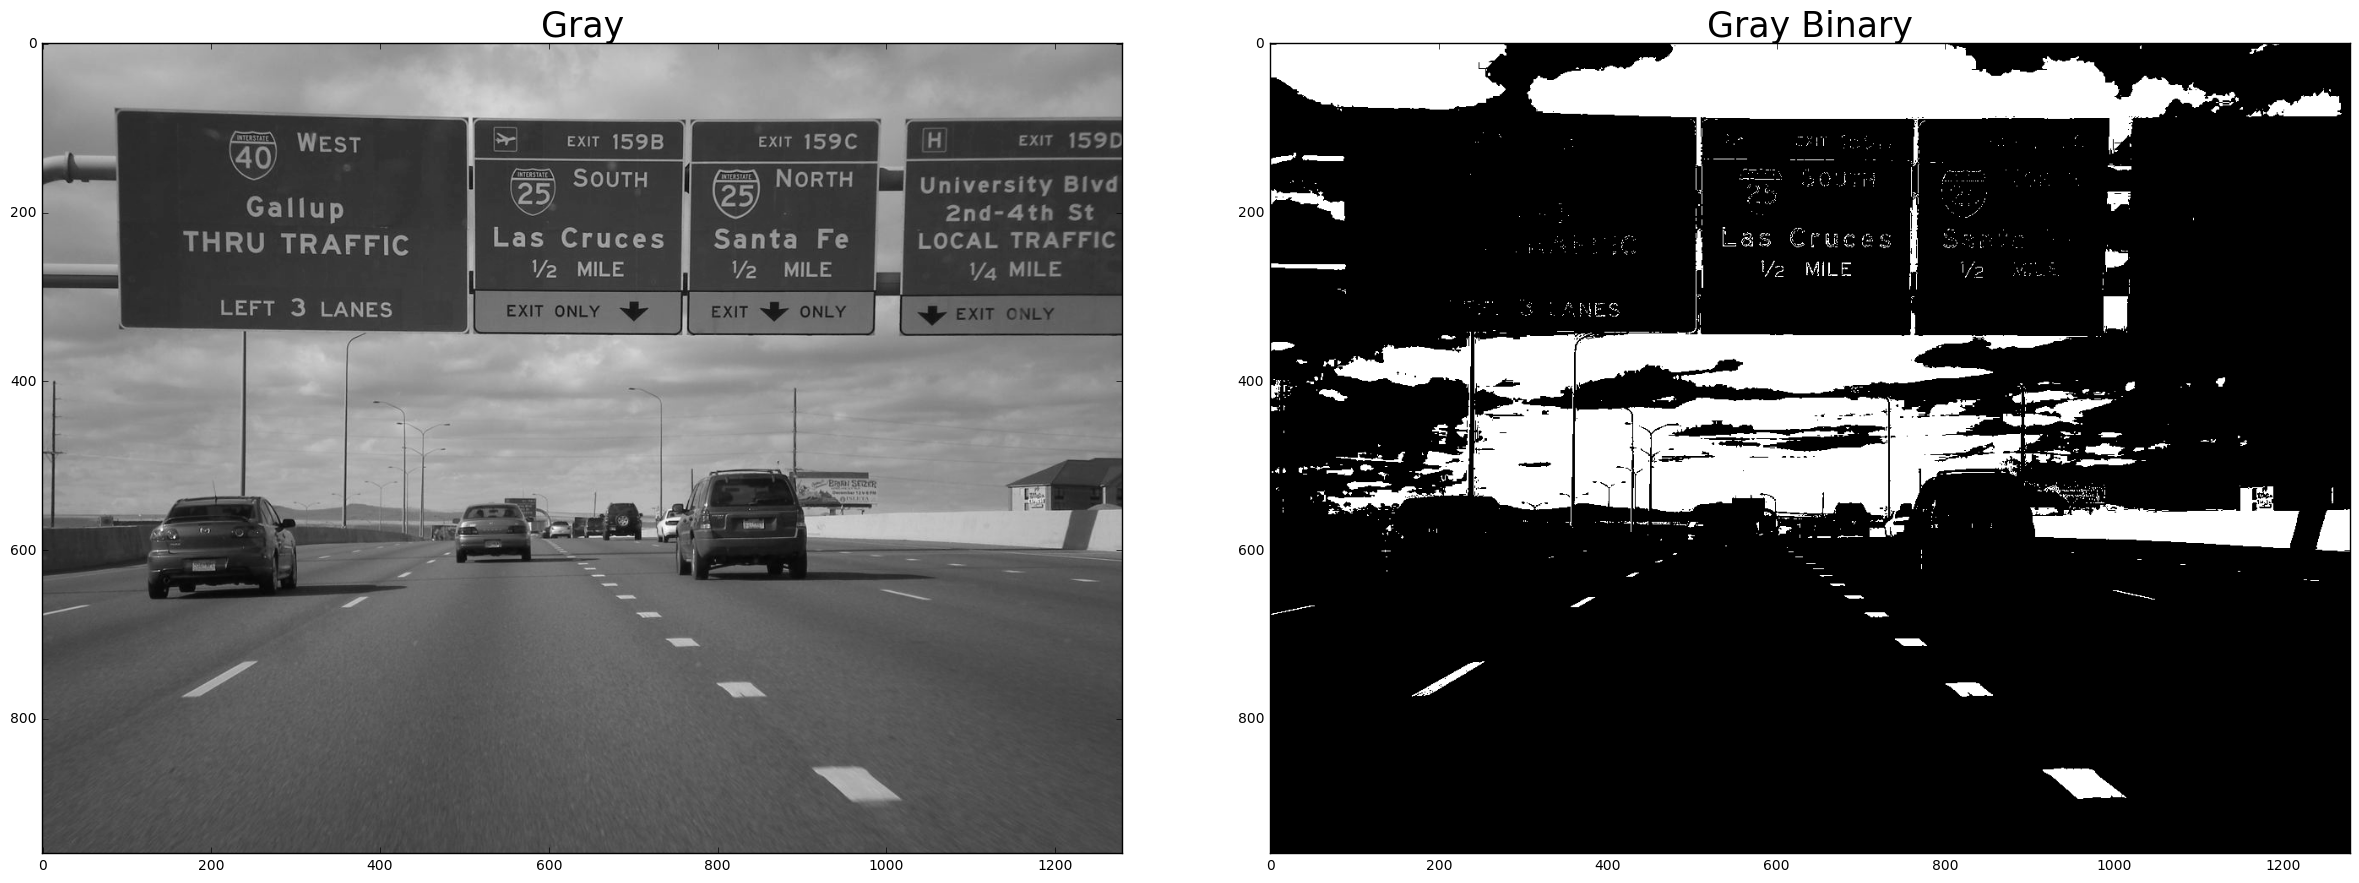

In [36]:
thresh = (160, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gray, cmap='gray')
ax1.set_title('Gray', fontsize=25)
ax2.imshow(binary, cmap='gray')
ax2.set_title('Gray Binary', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [5]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

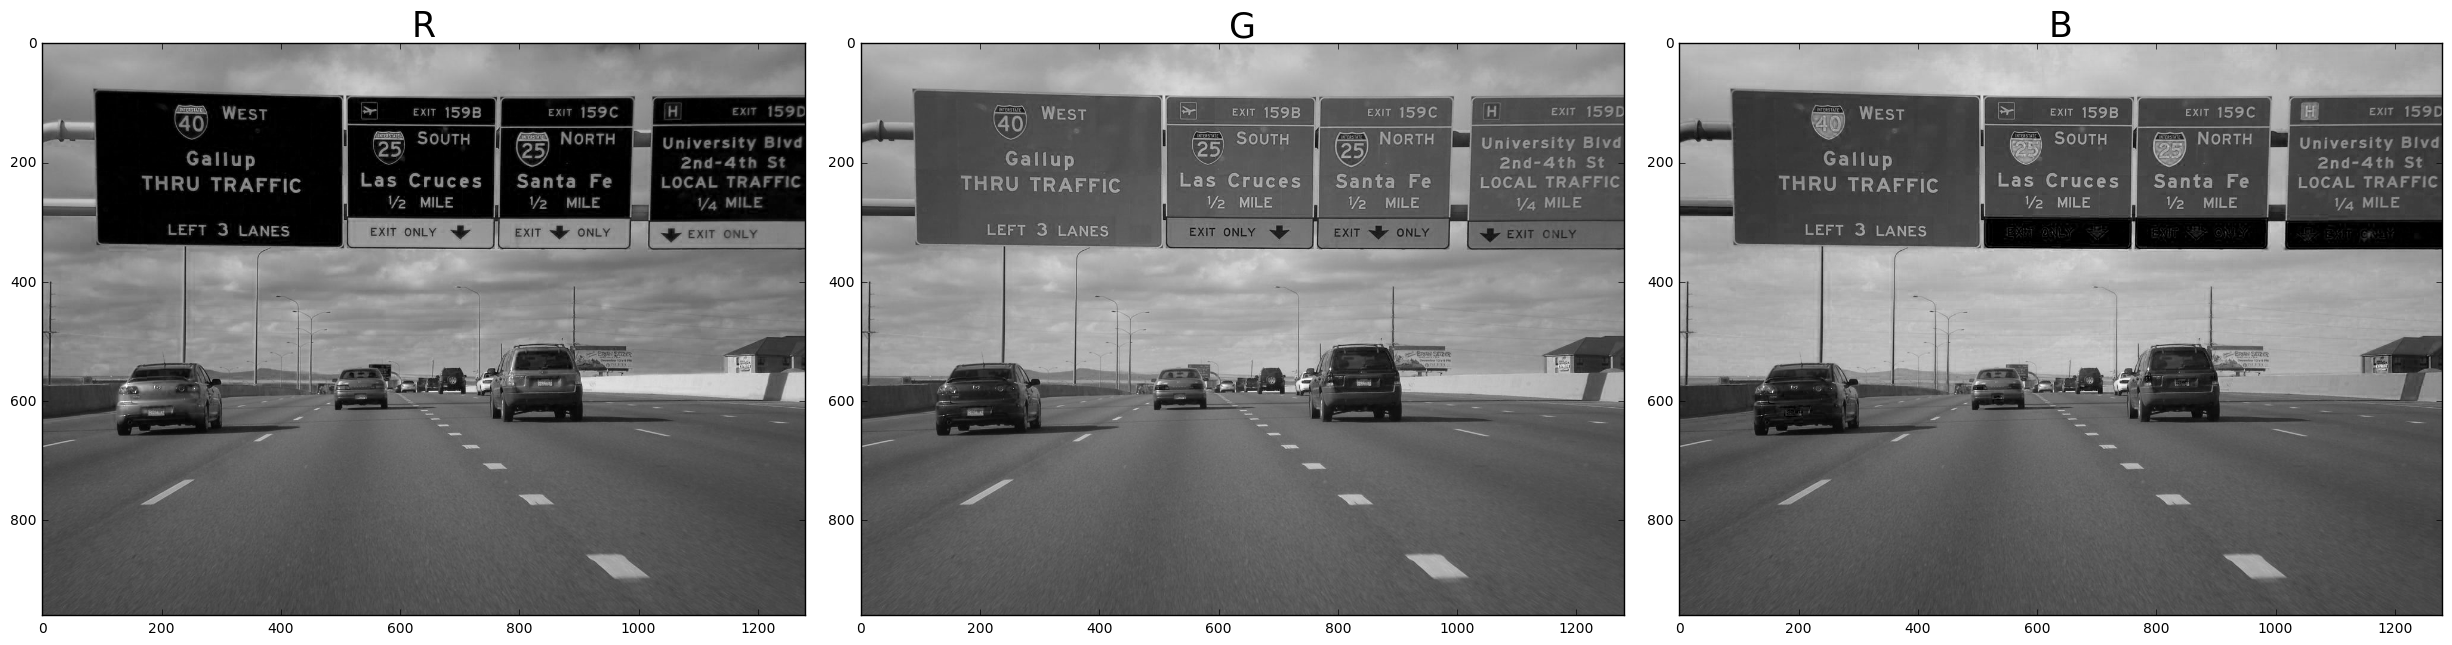

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(R, cmap='gray')
ax1.set_title('R', fontsize=25)

ax2.imshow(G, cmap='gray')
ax2.set_title('G', fontsize=25)

ax3.imshow(B, cmap='gray')
ax3.set_title('B', fontsize=25)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

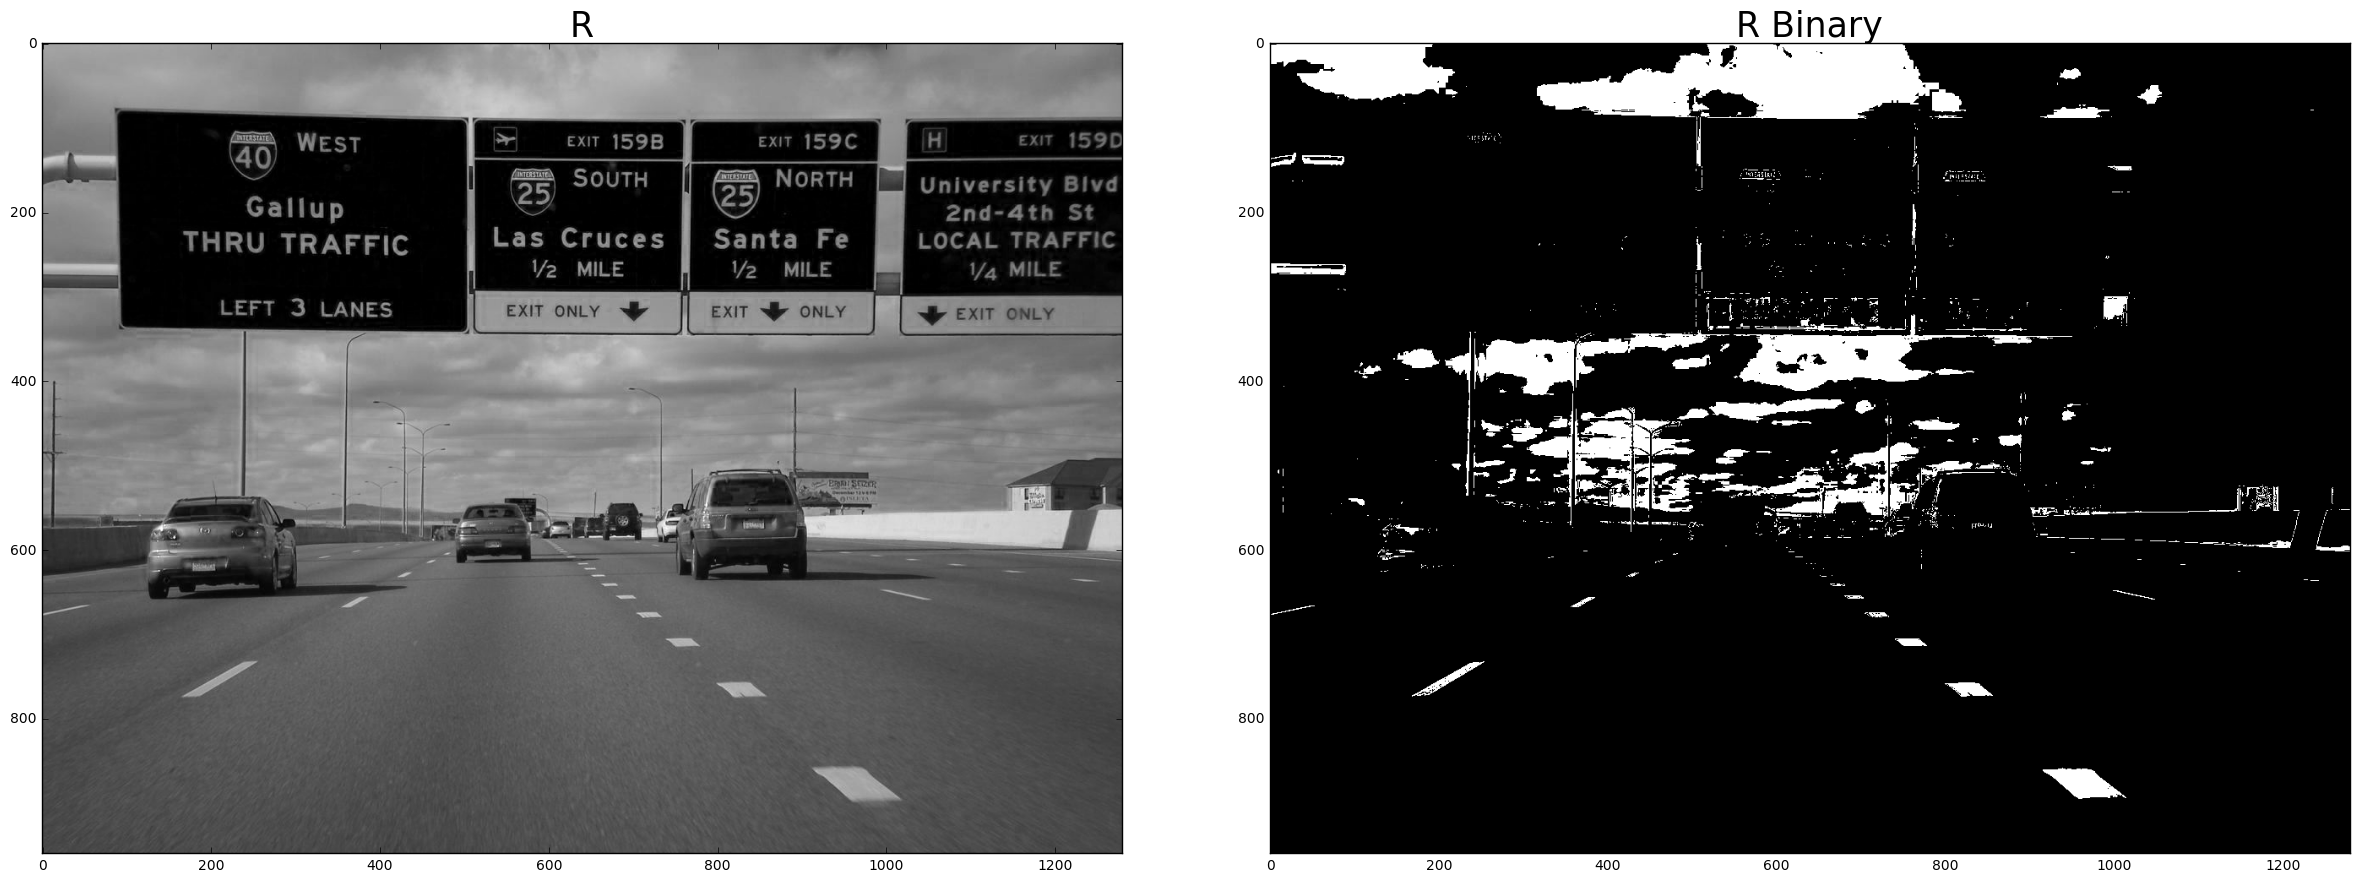

In [29]:
thresh = (155, 190)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(R, cmap='gray')
ax1.set_title('R', fontsize=25)
ax2.imshow(binary, cmap='gray')
ax2.set_title('R Binary', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

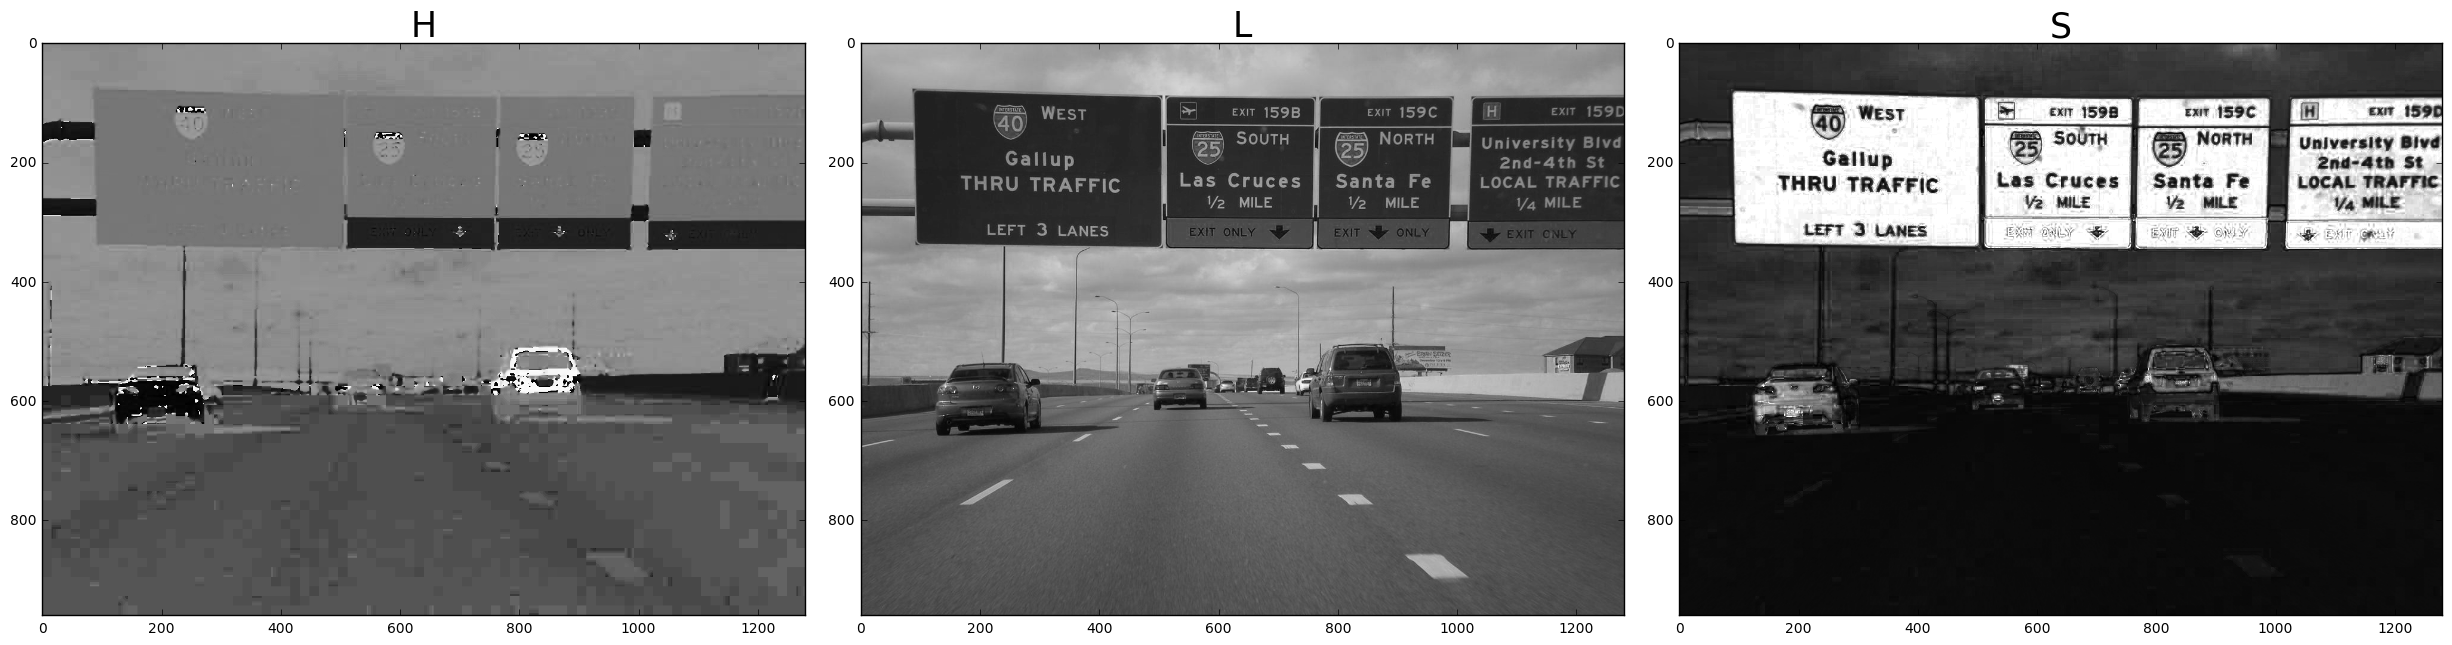

In [30]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(H, cmap='gray')
ax1.set_title('H', fontsize=25)

ax2.imshow(L, cmap='gray')
ax2.set_title('L', fontsize=25)

ax3.imshow(S, cmap='gray')
ax3.set_title('S', fontsize=25)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

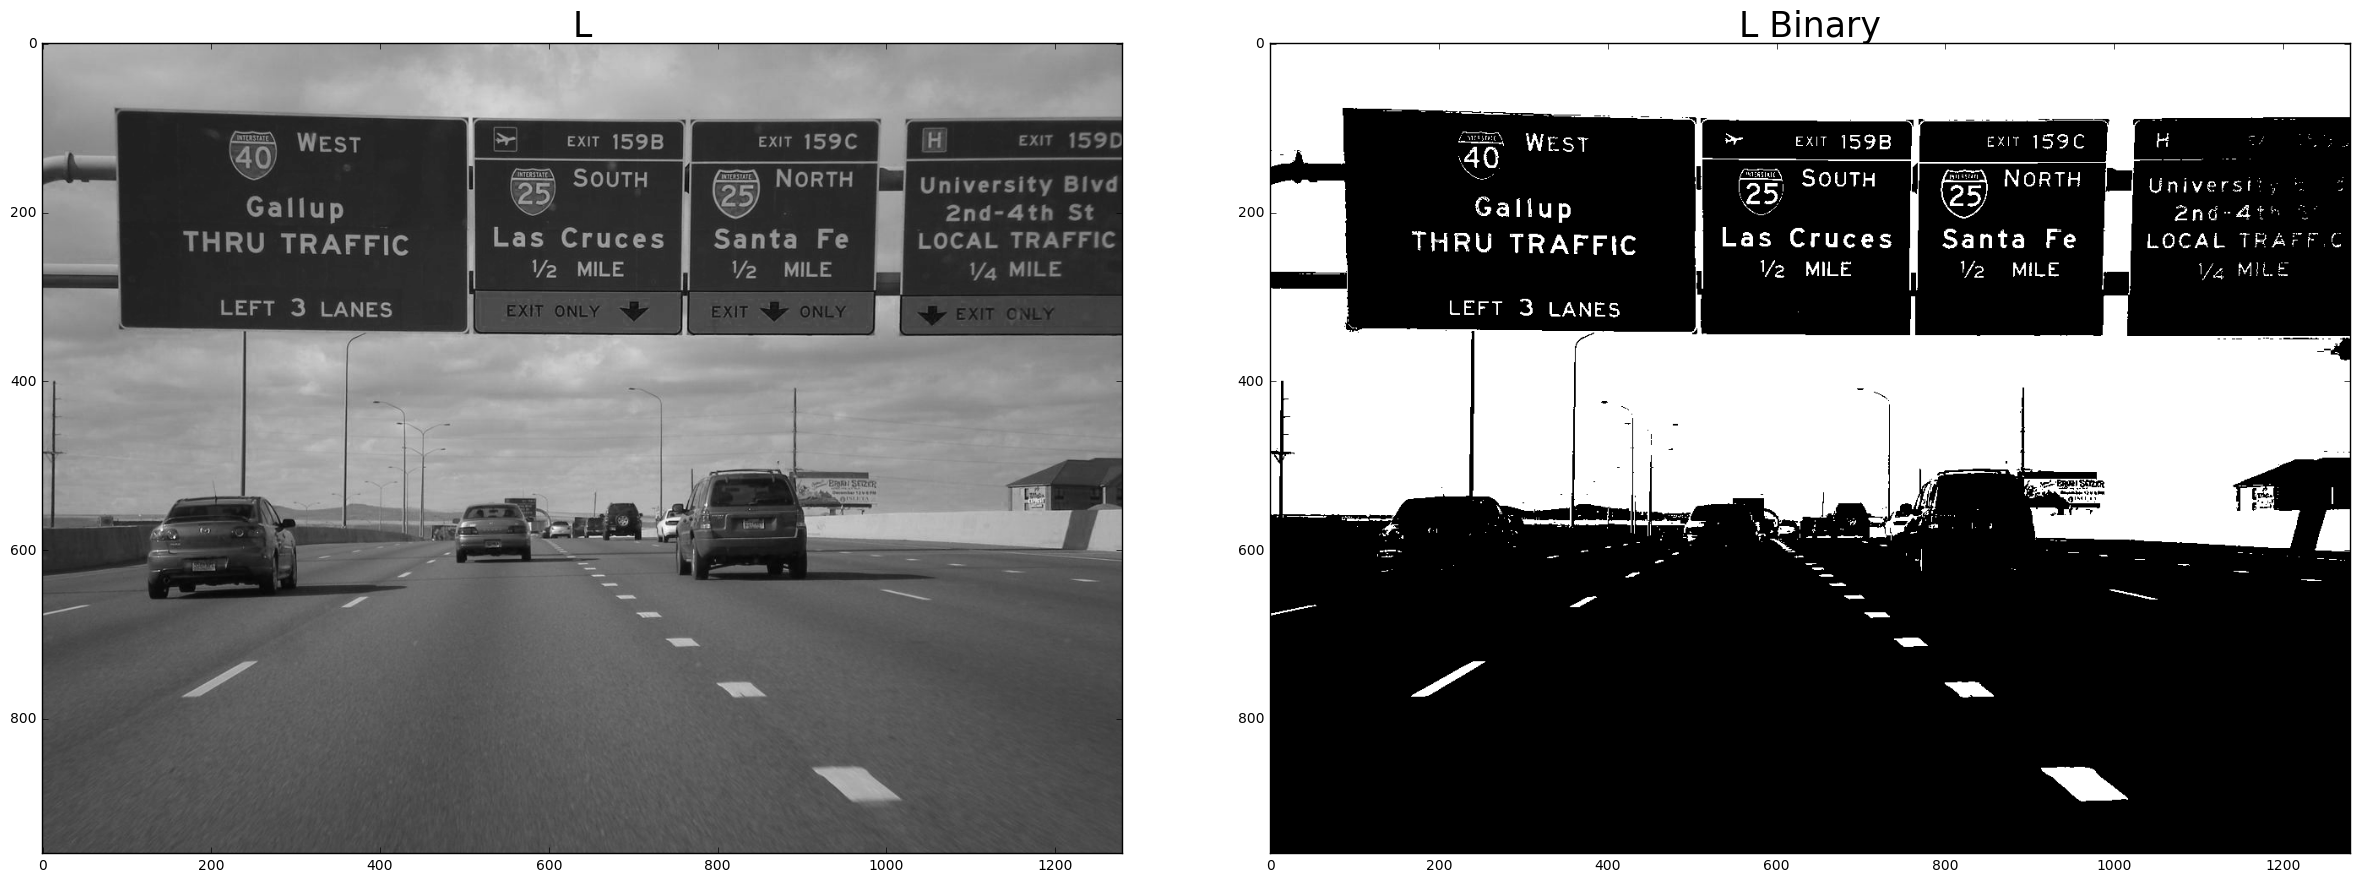

In [31]:
thresh = (130, 255)
binary = np.zeros_like(L)
binary[(L > thresh[0]) & (L <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(L, cmap='gray')
ax1.set_title('L', fontsize=25)
ax2.imshow(binary, cmap='gray')
ax2.set_title('L Binary', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [37]:
# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

# HLS Threshold

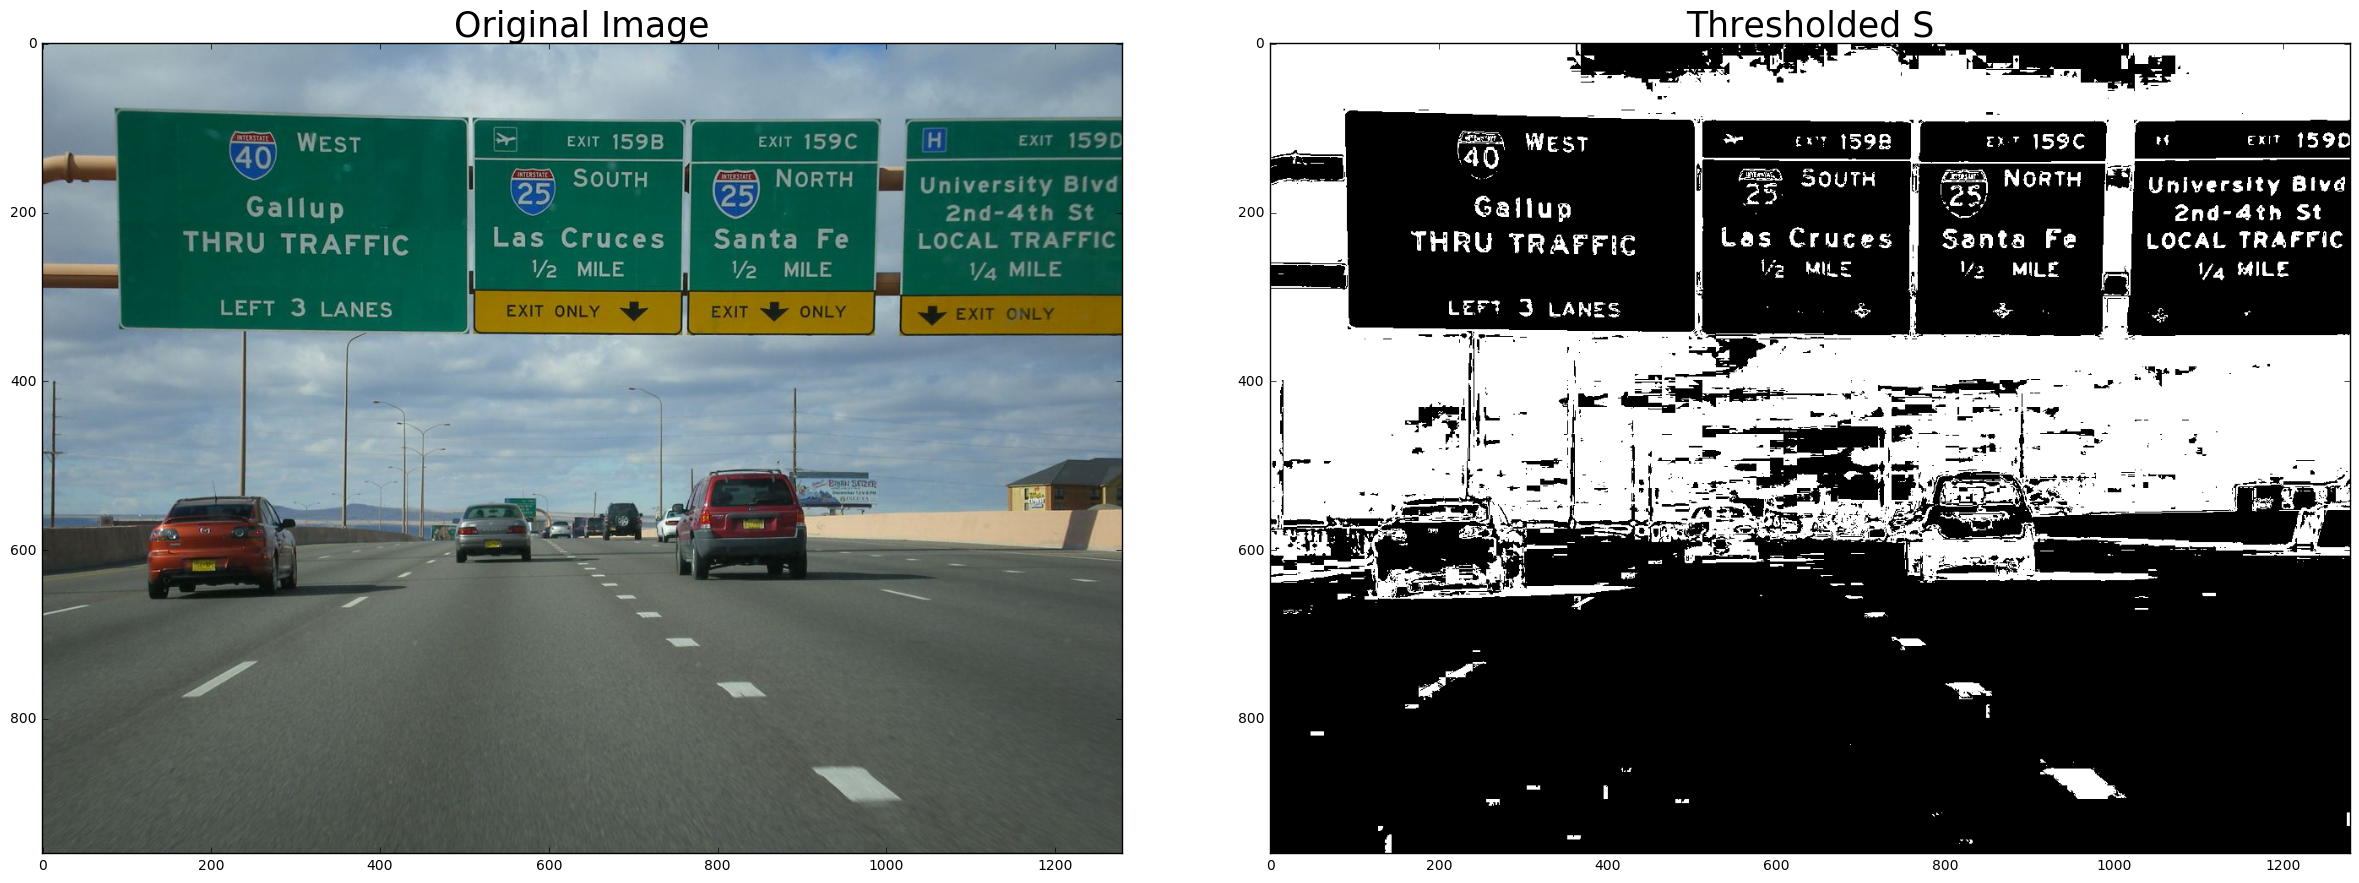

In [47]:
# hls image
hls_binary = hls_select(image, thresh=(15, 60))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Color and Gradient

In [49]:
# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    return color_binary

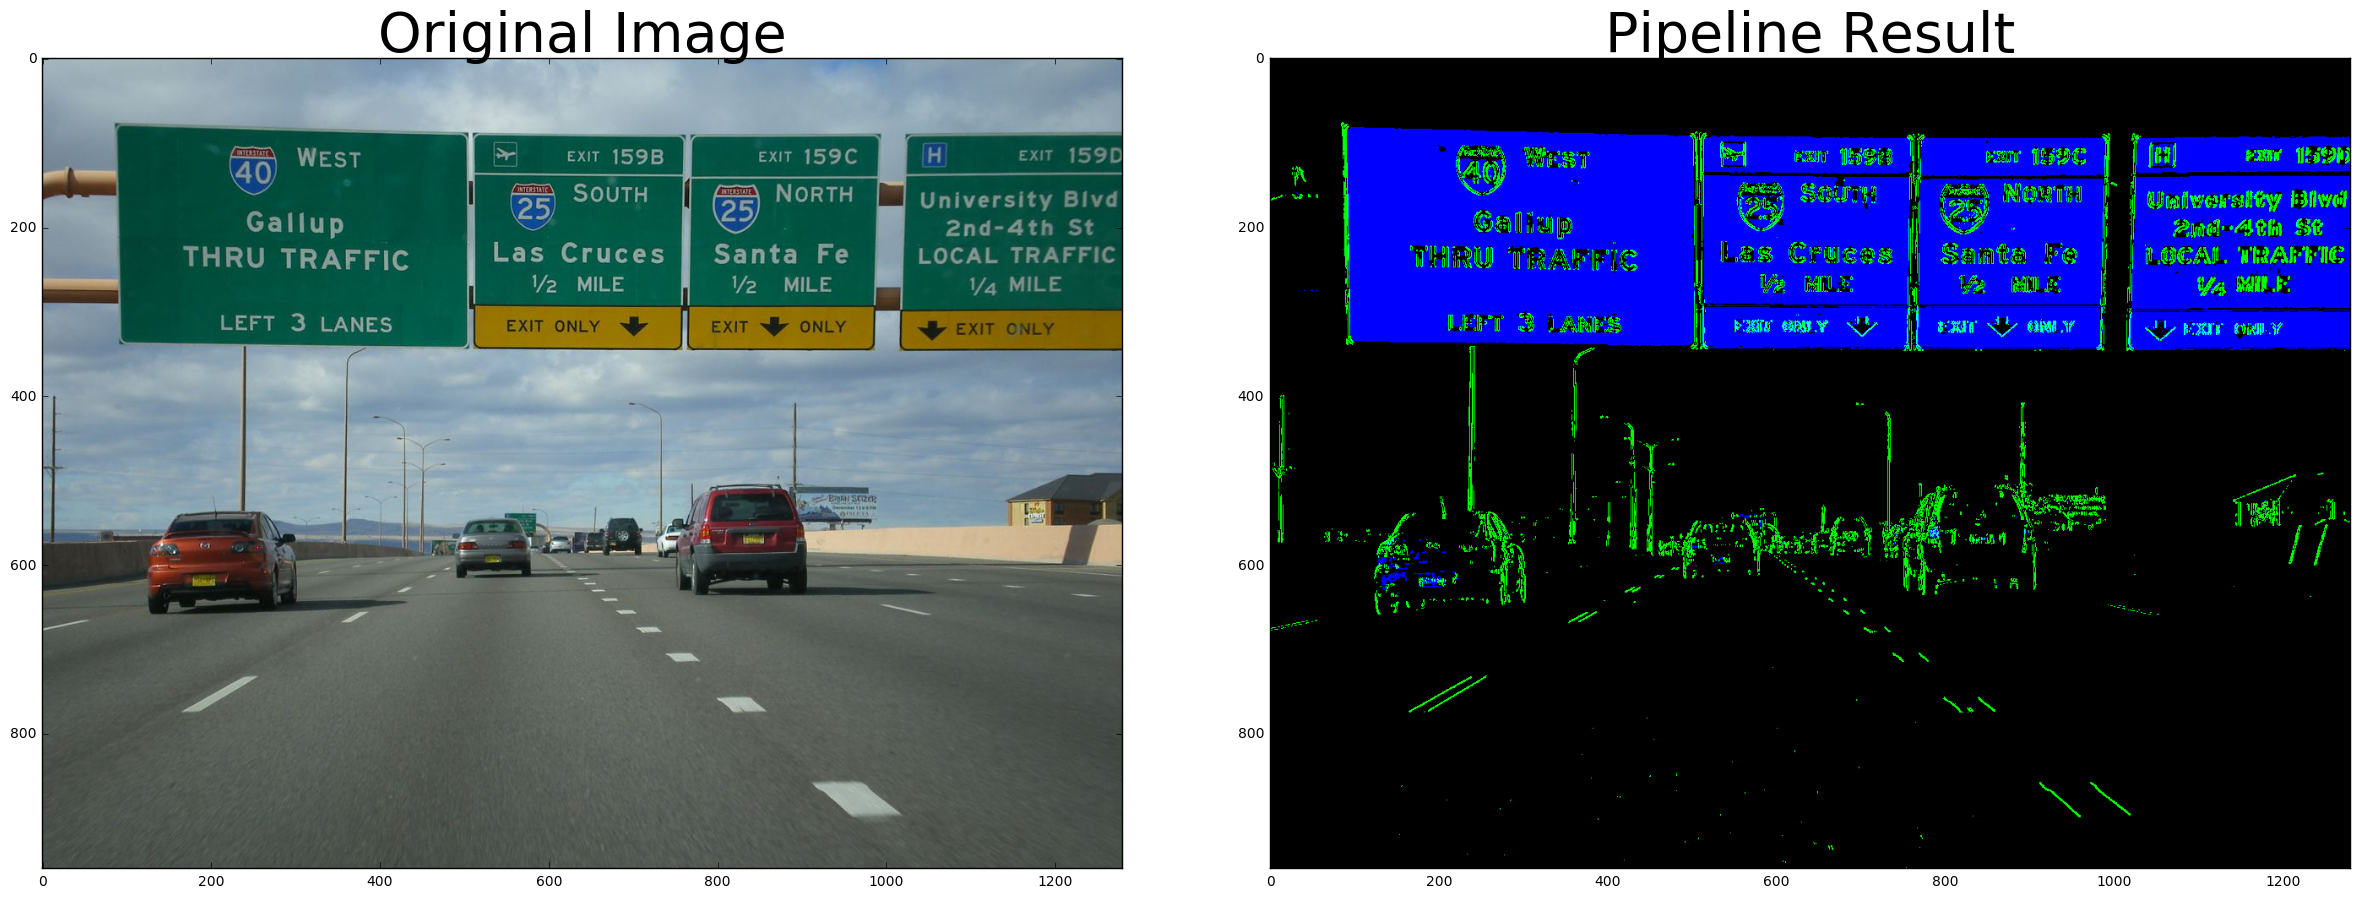

In [50]:
# processed img
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)